In [111]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.impute import SimpleImputer
from statsmodels.tsa.arima_model import ARIMA

In [4]:
df = pd.read_csv('OX.csv', low_memory=False)

In [17]:
df_ENG = df[df['RegionCode']=='UK_ENG']

In [47]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

In [48]:
y = [df_ENG['ConfirmedCases']]

In [78]:
imputer.fit(y)
y = imputer.transform(y).transpose()

In [79]:
X = [df_ENG['GovernmentResponseIndex']]

In [80]:
imputer.fit(X)
X = imputer.transform(X).transpose()

In [81]:
model = LinearRegression()

In [83]:
y.shape

(338, 1)

In [117]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [122]:
y_diff = np.array(difference(y))

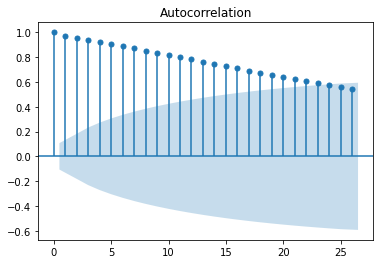

In [109]:
plot_acf(y);

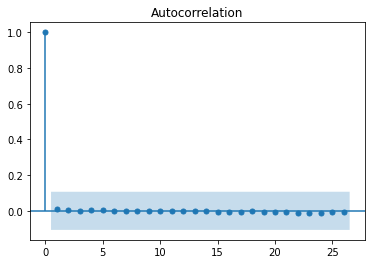

In [124]:
plot_acf(y_diff);

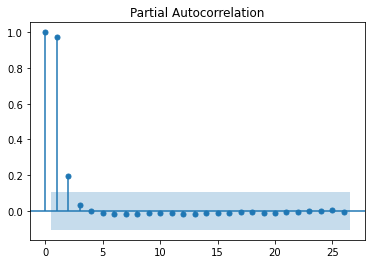

In [112]:
plot_pacf(y);

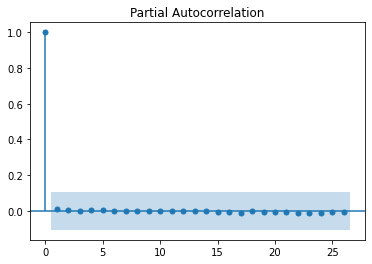

In [127]:
plot_pacf(y_diff);

In [84]:
X.shape

(338, 1)

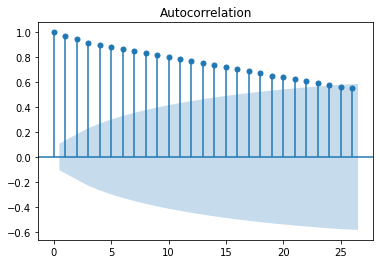

In [110]:
plot_acf(X);

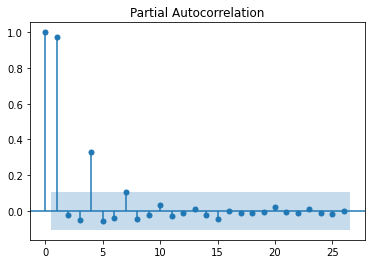

In [113]:
plot_pacf(X);

In [132]:
arima = ARIMA(endog=y_diff, order=(1,1,1))

In [134]:
arima = arima.fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
arima.summary()